In [1]:
import math, time, random, datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix,matthews_corrcoef, roc_curve, auc


In [2]:
train = pd.read_csv('UNSW_NB15_training-set.csv')
test = pd.read_csv('UNSW_NB15_testing-set.csv')

print('UNSW test data:\n') 
test.head()

UNSW test data:



,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [4]:
print('Train data:\n') 
train.head()

Train data:



,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [5]:
data = pd.concat([train,test]).reset_index(drop=True)
cols_cat = data.select_dtypes('object').columns #only categorical values
cols_numeric = data._get_numeric_data().columns #only numeric values
data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [6]:
print('Categorical Attributes:',cols_cat)
print()
print('Numerical Attributes:',cols_numeric)

Categorical Attributes: Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')

Numerical Attributes: Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')


In [7]:
data.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,257673.000000,257673.000000,2.576730e+05,...,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000
mean,72811.823858,1.246715,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,180.000931,84.754957,7.060869e+07,...,5.238271,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,0.639077
std,48929.917641,5.974305,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,102.488268,112.762131,1.857313e+08,...,8.160822,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,0.480269
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32210.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,62.000000,0.000000,1.231800e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,64419.000000,0.004285,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,254.000000,29.000000,7.439423e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,110923.000000,0.685777,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,254.000000,252.000000,8.000000e+07,...,4.000000,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,1.000000
max,175341.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,59.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [8]:
print(data.isnull().sum())#check for null values

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [9]:
data.shape

(257673, 45)

In [10]:
data.dtypes

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

In [11]:
data.nunique()

id                   175341
dur                  109945
proto                   133
service                  13
state                    11
spkts                   646
dpkts                   627
sbytes                 9382
dbytes                 8653
rate                 115763
sttl                     13
dttl                      9
sload                121356
dload                116380
sloss                   490
dloss                   476
sinpkt               114318
dinpkt               110270
sjit                 117101
djit                 114861
swin                     22
stcpb                114473
dtcpb                114187
dwin                     19
tcprtt                63878
synack                57366
ackdat                53248
smean                  1377
dmean                  1362
trans_depth              14
response_body_len      2819
ct_srv_src               57
ct_state_ttl              7
ct_dst_ltm               52
ct_src_dport_ltm         52
ct_dst_sport_ltm    

In [12]:
data = data.dropna('columns')
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
257669,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
257670,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
257671,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


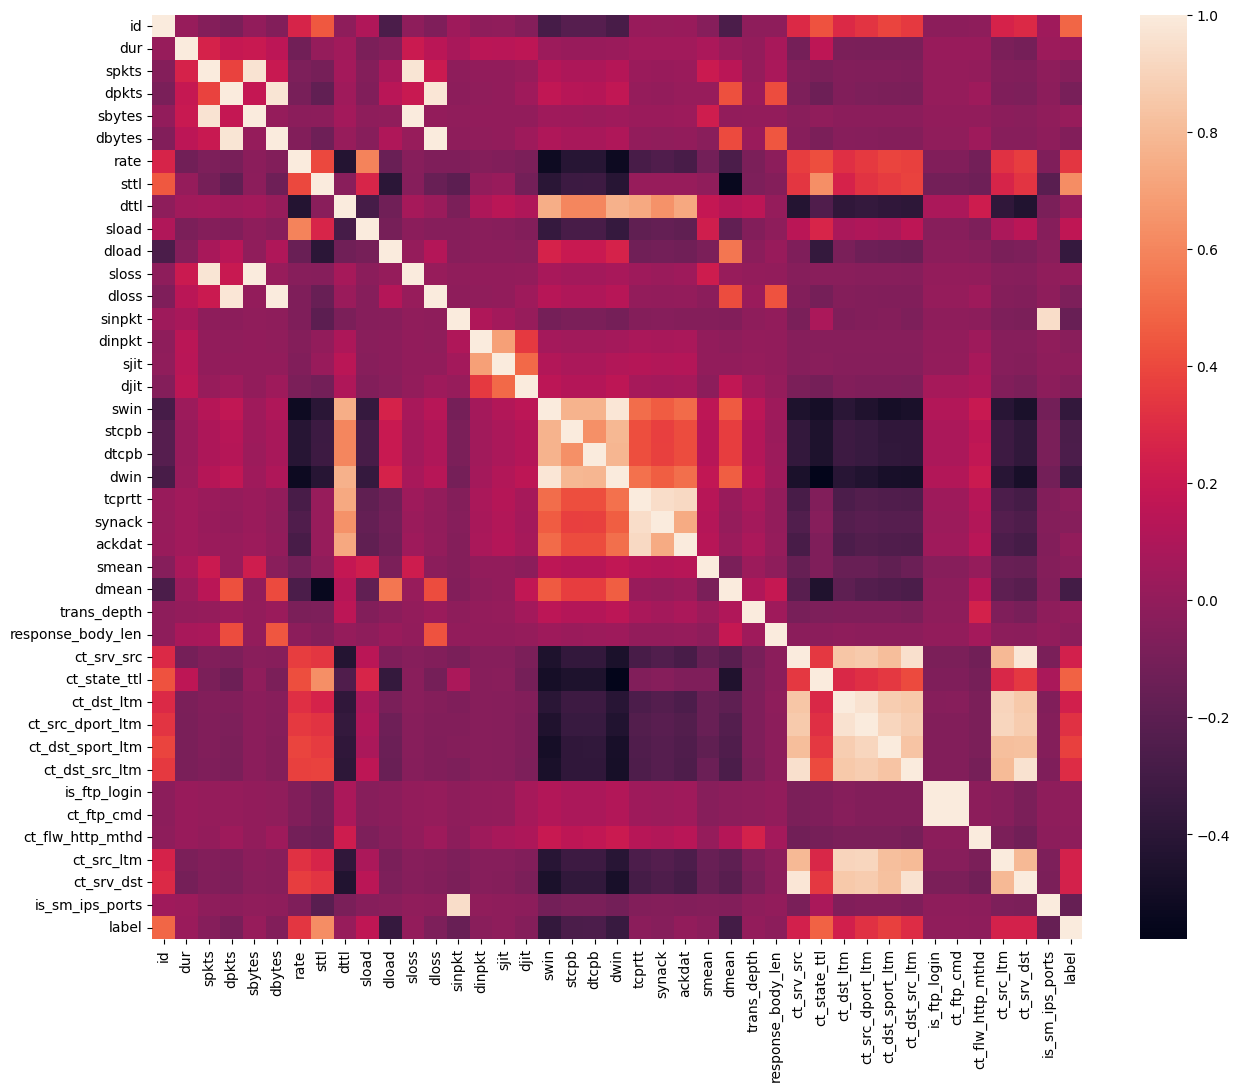

In [13]:
corr = data.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr)
plt.show()

In [14]:
data=data.drop(['id','sloss','dloss','spkts','dpkts','sinpkt','is_ftp_login'],axis=1)
data

,dur,proto,service,state,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,496,0,90909.090200,254,0,1.803636e+08,...,1,1,2,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,1762,0,125000.000300,254,0,8.810000e+08,...,1,1,2,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,1068,0,200000.005100,254,0,8.544000e+08,...,1,1,3,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,900,0,166666.660800,254,0,6.000000e+08,...,2,1,3,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2126,0,100000.002500,254,0,8.504000e+08,...,2,1,3,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000009,udp,dns,INT,114,0,111111.107200,254,0,5.066666e+07,...,24,13,24,0,0,24,24,0,Generic,1
257669,0.505762,tcp,-,FIN,620,354,33.612649,254,252,8.826286e+03,...,1,1,2,0,0,1,1,0,Shellcode,1
257670,0.000009,udp,dns,INT,114,0,111111.107200,254,0,5.066666e+07,...,3,3,13,0,0,3,12,0,Generic,1
257671,0.000009,udp,dns,INT,114,0,111111.107200,254,0,5.066666e+07,...,30,14,30,0,0,30,30,0,Generic,1


In [15]:
data['ct_srv_src'].corr(data['ct_srv_dst'])

0.9794668130725515

In [16]:
data['ct_dst_ltm'].corr(data['ct_src_dport_ltm'])

0.961517698656898

In [17]:
data['ct_dst_src_ltm'].corr(data['ct_srv_src'])

0.9539519771685998

In [18]:
data['swin'].corr(data['dwin'])

0.9804584289136417

In [19]:
data['synack'].corr(data['tcprtt'])

0.9430527539834985

In [20]:
data['ackdat'].corr(data['tcprtt'])

0.9202175911910013

In [21]:
data = data.drop(['ct_srv_src','ct_dst_ltm','ct_dst_src_ltm','swin','tcprtt'],axis=1)

In [22]:
data

,dur,proto,service,state,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_state_ttl,ct_src_dport_ltm,ct_dst_sport_ltm,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,496,0,90909.090200,254,0,1.803636e+08,...,2,1,1,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,1762,0,125000.000300,254,0,8.810000e+08,...,2,1,1,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,1068,0,200000.005100,254,0,8.544000e+08,...,2,1,1,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,900,0,166666.660800,254,0,6.000000e+08,...,2,2,1,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2126,0,100000.002500,254,0,8.504000e+08,...,2,2,1,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000009,udp,dns,INT,114,0,111111.107200,254,0,5.066666e+07,...,2,24,13,0,0,24,24,0,Generic,1
257669,0.505762,tcp,-,FIN,620,354,33.612649,254,252,8.826286e+03,...,1,1,1,0,0,1,1,0,Shellcode,1
257670,0.000009,udp,dns,INT,114,0,111111.107200,254,0,5.066666e+07,...,2,3,3,0,0,3,12,0,Generic,1
257671,0.000009,udp,dns,INT,114,0,111111.107200,254,0,5.066666e+07,...,2,30,14,0,0,30,30,0,Generic,1


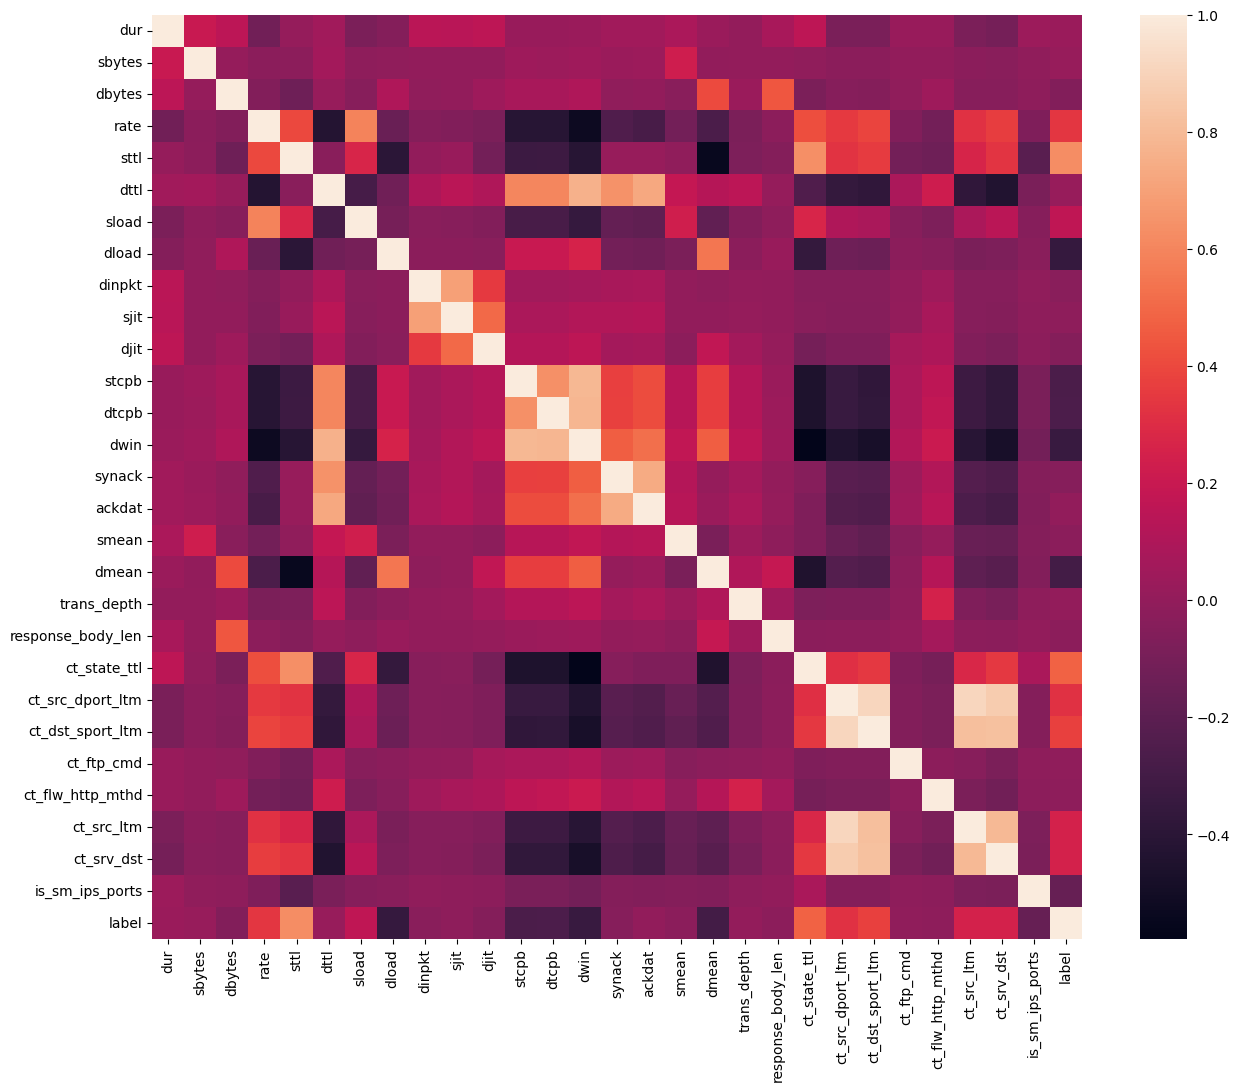

In [23]:
corr = data.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr)
plt.show()

In [24]:
data.drop(['attack_cat'], axis=1, inplace=True)


In [25]:
cols_cat = data.select_dtypes('object').columns #only categorical values
cols_numeric = data._get_numeric_data().columns #only numeric values
data.head()

,dur,proto,service,state,sbytes,dbytes,rate,sttl,dttl,sload,...,response_body_len,ct_state_ttl,ct_src_dport_ltm,ct_dst_sport_ltm,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000011,udp,-,INT,496,0,90909.0902,254,0,180363632.0,...,0,2,1,1,0,0,1,2,0,0
1,0.000008,udp,-,INT,1762,0,125000.0003,254,0,881000000.0,...,0,2,1,1,0,0,1,2,0,0
2,0.000005,udp,-,INT,1068,0,200000.0051,254,0,854400000.0,...,0,2,1,1,0,0,1,3,0,0
3,0.000006,udp,-,INT,900,0,166666.6608,254,0,600000000.0,...,0,2,2,1,0,0,2,3,0,0
4,0.000010,udp,-,INT,2126,0,100000.0025,254,0,850400000.0,...,0,2,2,1,0,0,2,3,0,0


In [26]:
cols_cat = list(cols_cat)
cols_numeric = list(cols_numeric)#numeric data
cols_numeric.remove('label')


In [27]:
cols_numeric

['dur',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'dinpkt',
 'sjit',
 'djit',
 'stcpb',
 'dtcpb',
 'dwin',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_state_ttl',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports']

In [28]:
#Visualization
def bar_graph(feature):
    data[feature].value_counts().plot(kind="bar")

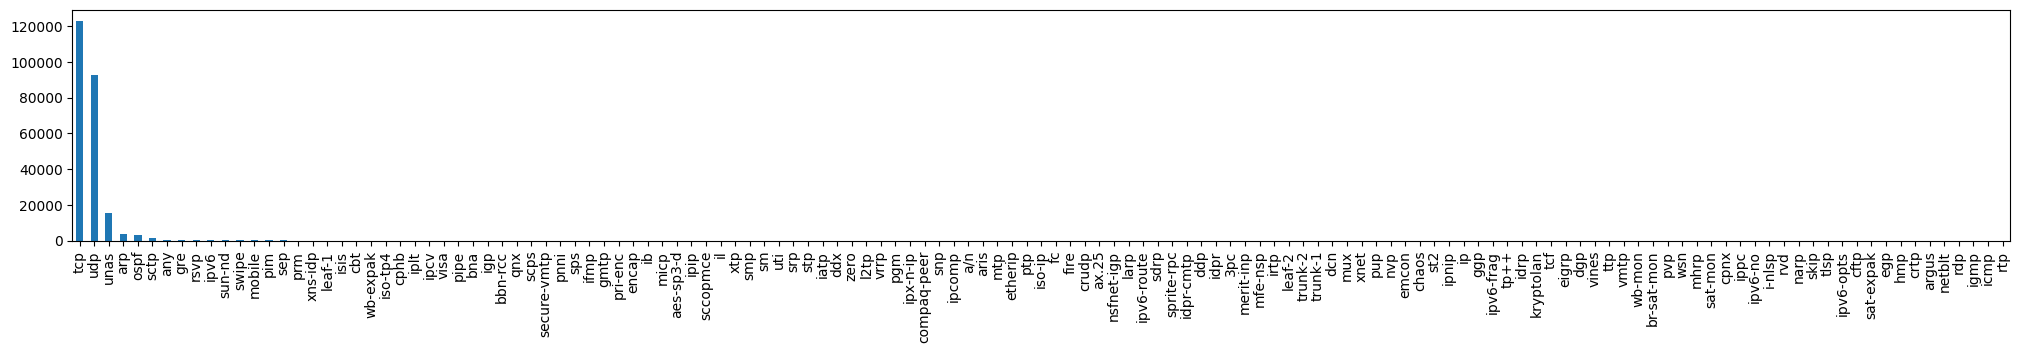

In [29]:
plt.figure(figsize=(25,3))
bar_graph('proto')

In [30]:
data['proto'].unique()#get the unique values of protocol column

array(['udp', 'arp', 'tcp', 'igmp', 'ospf', 'sctp', 'gre', 'ggp', 'ip',
       'ipnip', 'st2', 'argus', 'chaos', 'egp', 'emcon', 'nvp', 'pup',
       'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1', 'trunk-2',
       'xns-idp', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'netblt', 'mfe-nsp',
       'merit-inp', '3pc', 'idpr', 'ddp', 'idpr-cmtp', 'tp++', 'ipv6',
       'sdrp', 'ipv6-frag', 'ipv6-route', 'idrp', 'mhrp', 'i-nlsp', 'rvd',
       'mobile', 'narp', 'skip', 'tlsp', 'ipv6-no', 'any', 'ipv6-opts',
       'cftp', 'sat-expak', 'ippc', 'kryptolan', 'sat-mon', 'cpnx', 'wsn',
       'pvp', 'br-sat-mon', 'sun-nd', 'wb-mon', 'vmtp', 'ttp', 'vines',
       'nsfnet-igp', 'dgp', 'eigrp', 'tcf', 'sprite-rpc', 'larp', 'mtp',
       'ax.25', 'ipip', 'aes-sp3-d', 'micp', 'encap', 'pri-enc', 'gmtp',
       'ifmp', 'pnni', 'qnx', 'scps', 'cbt', 'bbn-rcc', 'igp', 'bna',
       'swipe', 'visa', 'ipcv', 'cphb', 'iso-tp4', 'wb-expak', 'sep',
       'secure-vmtp', 'xtp', 'il', 'rsvp', 'unas', 'fc', 'iso-ip',


In [31]:
data['proto'].value_counts()#get the values of protocol column

tcp       123041
udp        92701
unas       15599
arp         3846
ospf        3271
           ...  
netblt       131
rdp          131
igmp          48
icmp          15
rtp            1
Name: proto, Length: 133, dtype: int64

In [32]:
def Remove_dump_values(data, cols):
    for col in cols:
        data[col] = np.where(data[col] == '-', 'None', data[col])# Replacing '-' to 'none'
    return data

In [33]:
data['service'].unique()

array(['-', 'http', 'ftp', 'ftp-data', 'smtp', 'pop3', 'dns', 'snmp',
       'ssl', 'dhcp', 'irc', 'radius', 'ssh'], dtype=object)

In [34]:
data['service'].value_counts()

-           141321
dns          68661
http         27011
smtp          6909
ftp-data      5391
ftp           4980
pop3          1528
ssh           1506
dhcp           120
snmp           109
ssl             86
irc             30
radius          21
Name: service, dtype: int64

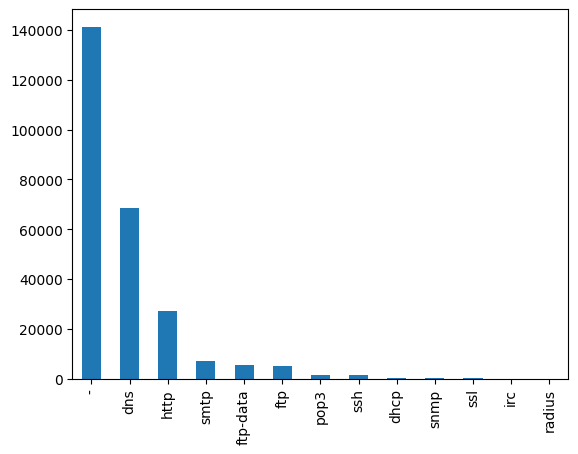

In [35]:
bar_graph('service')

In [36]:
#removing all '-' to 'none'
data = Remove_dump_values(data, cols_cat)
data

,dur,proto,service,state,sbytes,dbytes,rate,sttl,dttl,sload,...,response_body_len,ct_state_ttl,ct_src_dport_ltm,ct_dst_sport_ltm,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000011,udp,None,INT,496,0,90909.090200,254,0,1.803636e+08,...,0,2,1,1,0,0,1,2,0,0
1,0.000008,udp,None,INT,1762,0,125000.000300,254,0,8.810000e+08,...,0,2,1,1,0,0,1,2,0,0
2,0.000005,udp,None,INT,1068,0,200000.005100,254,0,8.544000e+08,...,0,2,1,1,0,0,1,3,0,0
3,0.000006,udp,None,INT,900,0,166666.660800,254,0,6.000000e+08,...,0,2,2,1,0,0,2,3,0,0
4,0.000010,udp,None,INT,2126,0,100000.002500,254,0,8.504000e+08,...,0,2,2,1,0,0,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000009,udp,dns,INT,114,0,111111.107200,254,0,5.066666e+07,...,0,2,24,13,0,0,24,24,0,1
257669,0.505762,tcp,None,FIN,620,354,33.612649,254,252,8.826286e+03,...,0,1,1,1,0,0,1,1,0,1
257670,0.000009,udp,dns,INT,114,0,111111.107200,254,0,5.066666e+07,...,0,2,3,3,0,0,3,12,0,1
257671,0.000009,udp,dns,INT,114,0,111111.107200,254,0,5.066666e+07,...,0,2,30,14,0,0,30,30,0,1


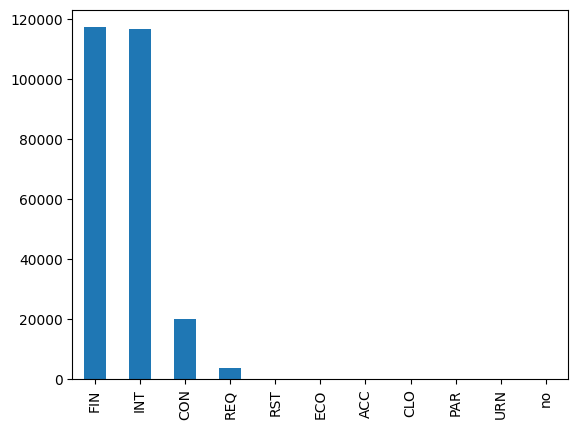

In [37]:
bar_graph('state')

In [38]:
data['state'].value_counts()

FIN    117164
INT    116438
CON     20134
REQ      3833
RST        84
ECO        12
ACC         4
CLO         1
PAR         1
URN         1
no          1
Name: state, dtype: int64

In [39]:
data['state'].unique()

array(['INT', 'FIN', 'REQ', 'ACC', 'CON', 'RST', 'CLO', 'ECO', 'PAR',
       'URN', 'no'], dtype=object)

In [40]:
cols_cat.remove('proto')
data = data.drop('proto',axis=1)

In [41]:
df= pd.get_dummies(data,columns=cols_cat)
df.head()

,dur,sbytes,dbytes,rate,sttl,dttl,sload,dload,dinpkt,sjit,...,state_CLO,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.000011,496,0,90909.0902,254,0,180363632.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1,0.000008,1762,0,125000.0003,254,0,881000000.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,0.000005,1068,0,200000.0051,254,0,854400000.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,0.000006,900,0,166666.6608,254,0,600000000.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,0.000010,2126,0,100000.0025,254,0,850400000.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [42]:
df.shape

(257673, 53)

In [43]:
df.describe()

,dur,sbytes,dbytes,rate,sttl,dttl,sload,dload,dinpkt,sjit,...,state_CLO,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
count,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,257673.000000,257673.000000,2.576730e+05,2.576730e+05,257673.000000,2.576730e+05,...,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000
mean,1.246715,8.572952e+03,1.438729e+04,9.125391e+04,180.000931,84.754957,7.060869e+07,6.582143e+05,98.915462,5.419373e+03,...,0.000004,0.078138,0.000047,0.454700,0.451883,0.000004,0.014875,0.000326,0.000004,0.000004
std,5.974305,1.737739e+05,1.461993e+05,1.603446e+05,102.488268,112.762131,1.857313e+08,2.412372e+06,1094.048691,4.903450e+04,...,0.001970,0.268389,0.006824,0.497945,0.497680,0.001970,0.121055,0.018052,0.001970,0.001970
min,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000008,1.140000e+02,0.000000e+00,3.078928e+01,62.000000,0.000000,1.231800e+04,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.004285,5.280000e+02,1.780000e+02,2.955665e+03,254.000000,29.000000,7.439423e+05,1.747441e+03,0.007000,6.736370e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.685777,1.362000e+03,1.064000e+03,1.250000e+05,254.000000,252.000000,8.000000e+07,2.210538e+04,56.438859,2.787367e+03,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,59.999989,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,2.242273e+07,57739.240000,1.483831e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
# Target variable and train set
y = df[['label']]
x = df.drop(['label'], axis=1)
col = x.columns
feats = list(x.columns)
print('x:\n',x)
print('y:\n',y)

x:
              dur  sbytes  dbytes           rate  sttl  dttl         sload  \
0       0.000011     496       0   90909.090200   254     0  1.803636e+08   
1       0.000008    1762       0  125000.000300   254     0  8.810000e+08   
2       0.000005    1068       0  200000.005100   254     0  8.544000e+08   
3       0.000006     900       0  166666.660800   254     0  6.000000e+08   
4       0.000010    2126       0  100000.002500   254     0  8.504000e+08   
...          ...     ...     ...            ...   ...   ...           ...   
257668  0.000009     114       0  111111.107200   254     0  5.066666e+07   
257669  0.505762     620     354      33.612649   254   252  8.826286e+03   
257670  0.000009     114       0  111111.107200   254     0  5.066666e+07   
257671  0.000009     114       0  111111.107200   254     0  5.066666e+07   
257672  0.000009     114       0  111111.107200   254     0  5.066666e+07   

              dload    dinpkt         sjit  ...  state_CLO  state_CON  

In [45]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
x = sc.fit_transform(x)

print('After normalisation(x): ',x)

After normalisation(x):  [[1.83333367e-07 3.28788116e-05 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.33333358e-07 1.21066472e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.33333486e-08 7.27234732e-05 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.50000028e-07 6.26926493e-06 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.50000028e-07 6.26926493e-06 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.50000028e-07 6.26926493e-06 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [46]:
if isinstance(y, np.ndarray):
    y = pd.DataFrame(y)
if isinstance(x, np.ndarray):
    x = pd.DataFrame(x , columns = col )

In [47]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(172640, 52) (85033, 52)
(172640, 1) (85033, 1)


In [48]:
X_train 

,dur,sbytes,dbytes,rate,sttl,dttl,sload,dload,dinpkt,sjit,...,state_CLO,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
68810,1.000000e-07,0.000005,0.000000,0.166667,0.996078,0.000000,1.002004e-02,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
202737,6.205316e-02,0.000085,0.000114,0.000012,0.243137,0.992126,4.291650e-07,0.000153,0.003015,0.007039,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
65372,8.169901e-03,0.000385,0.000051,0.000043,0.996078,0.992126,1.406611e-05,0.000478,0.001128,0.001454,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
98462,7.158501e-04,0.000168,0.001314,0.001793,0.121569,0.114173,7.384407e-05,0.156041,0.000019,0.000047,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
238734,5.839068e-03,0.000069,0.000018,0.000043,0.996078,0.992126,3.481643e-06,0.000228,0.001053,0.001255,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,5.308668e-04,0.000249,0.003323,0.003799,0.121569,0.114173,1.484404e-04,0.536818,0.000009,0.000021,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
103694,3.185301e-03,0.000141,0.000176,0.000246,0.121569,0.114173,1.370832e-05,0.004635,0.000132,0.000360,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
131932,2.324500e-02,0.000139,0.000054,0.000015,0.996078,0.992126,1.779808e-06,0.000182,0.002317,0.004810,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
146867,1.257064e-02,0.000071,0.001796,0.000076,0.243137,0.992126,1.758932e-06,0.012108,0.000365,0.001229,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
Y_train

,label
68810,0
202737,1
65372,1
98462,0
238734,1
...,...
119879,0
103694,0
131932,1
146867,1


In [50]:
def entropy(data):
    labels, counts = np.unique(data, return_counts=True)
    p = counts / len(data)
    entropy = -np.sum(p * np.log2(p))
    return entropy

target_entropy = entropy(y)
target_entropy


0.9434463233511085

In [51]:
def information_gain(data, feature, target_entropy):
    values, counts = data[feature].value_counts().index, data[feature].value_counts().values
    subset_entropy = 0
    for value, count in zip(values, counts):
        subset = data[data[feature] == value]
        subset_entropy += count / len(data) * entropy(subset['label'])
    info_gain = target_entropy - subset_entropy
    return info_gain




In [52]:
info_gains = {}
for feature in X_train.columns:
    info_gains[feature] = information_gain(pd.concat([X_train, pd.DataFrame(Y_train, columns=['label'])], axis=1), feature, target_entropy)

KeyboardInterrupt: 

In [ ]:
# Sort the features by information gain in descending order
selected_features = sorted(info_gains, key=info_gains.get, reverse=True)

# Print information gain for each feature
for feature in selected_features:
    print(f'Information Gain for Feature {feature}: {info_gains[feature]:.4f}')

In [ ]:
k = 20  # Set the desired number of top-k features
top_k_features = selected_features[:k]

# Extract the top-k features from the training and testing sets
X_train_selected = X_train[top_k_features]
X_test_selected = X_test[top_k_features]
top_k_features


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
k = 20  # Number of top features to select
selector = SelectKBest(chi2, k=k)
selector.fit(X_train, Y_train)

# Get the scores and p-values for each feature
scores = selector.scores_
pvalues = selector.pvalues_

# Create a DataFrame to store the feature scores and p-values
feature_scores_df = {'Feature': X_train.columns, 'Score': scores, 'p-value': pvalues}
print(feature_scores_df)

# Sort the features based on their scores in descending order
features_chi2 = feature_scores_df['Feature'].sort_values(ascending=False)


In [ ]:
features_chi2 = list(features_chi2)
features_chi2

In [ ]:
top_features = []
for feat in features_chi2:
    if feat in top_k_features:
        top_features.append(feat)
top_features

In [53]:
X = df.loc[:,['synack',
 'sttl',
 'stcpb',
 'state_INT',
 'smean',
 'sload',
 'sjit',
 'sbytes',
 'rate',
 'dur',
 'dttl',
 'dtcpb',
 'dmean',
 'dload',
 'djit',
 'dinpkt',
 'dbytes',
 'ct_state_ttl',
 'ct_dst_sport_ltm',
 'ackdat']]
X

,synack,sttl,stcpb,state_INT,smean,sload,sjit,sbytes,rate,dur,dttl,dtcpb,dmean,dload,djit,dinpkt,dbytes,ct_state_ttl,ct_dst_sport_ltm,ackdat
0,0.000000,254,0,1,248,1.803636e+08,0.000000,496,90909.090200,0.000011,0,0,0,0.000000,0.000000,0.00000,0,2,1,0.000000
1,0.000000,254,0,1,881,8.810000e+08,0.000000,1762,125000.000300,0.000008,0,0,0,0.000000,0.000000,0.00000,0,2,1,0.000000
2,0.000000,254,0,1,534,8.544000e+08,0.000000,1068,200000.005100,0.000005,0,0,0,0.000000,0.000000,0.00000,0,2,1,0.000000
3,0.000000,254,0,1,450,6.000000e+08,0.000000,900,166666.660800,0.000006,0,0,0,0.000000,0.000000,0.00000,0,2,1,0.000000
4,0.000000,254,0,1,1063,8.504000e+08,0.000000,2126,100000.002500,0.000010,0,0,0,0.000000,0.000000,0.00000,0,2,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000000,254,0,1,57,5.066666e+07,0.000000,114,111111.107200,0.000009,0,0,0,0.000000,0.000000,0.00000,0,2,13,0.000000
257669,0.036895,254,3518776216,0,62,8.826286e+03,3721.068786,620,33.612649,0.505762,252,3453092386,44,4903.492188,120.177727,66.98057,354,1,1,0.062545
257670,0.000000,254,0,1,57,5.066666e+07,0.000000,114,111111.107200,0.000009,0,0,0,0.000000,0.000000,0.00000,0,2,3,0.000000
257671,0.000000,254,0,1,57,5.066666e+07,0.000000,114,111111.107200,0.000009,0,0,0,0.000000,0.000000,0.00000,0,2,14,0.000000


In [54]:
y.value_counts()

label
1        164673
0         93000
dtype: int64

In [55]:
y

,label
0,0
1,0
2,0
3,0
4,0
...,...
257668,1
257669,1
257670,1
257671,1


In [56]:

def fit_algo(algo, x, y, cv):
# Fit the model
    model = algo.fit(x, y)

# Check its score
    acc = round(model.score(x, y) * 100, 2)  # accuracy for train set
    y_pred = model_selection.cross_val_predict(algo, x, y, cv=cv, n_jobs=-1)

    acc_cv = round(metrics.accuracy_score(y, y_pred) * 100, 2)  # accuracy for test set
    conf_m = confusion_matrix(y, y_pred)

    print('Confusion matrix:\n\n', conf_m)

# finding FP,FN,TP,TN
    FP = conf_m.sum(axis=0) - np.diag(conf_m)
    FN = conf_m.sum(axis=1) - np.diag(conf_m)
    TP = np.diag(conf_m)
    TN = conf_m.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
    Sen = TP / (TP + FN)
    asen =np.average(Sen)

# Specificity or true negative rate
    Spec = TN / (TN + FP)
    aspec = np.average(Spec)

# Fall out or false alarm rate or FAR
    FAR = (FP + FN) / (FP + FN + TN + TP)
    afar = np.average(FAR)

# matthews correlation coefficient
    mcc =matthews_corrcoef(y, y_pred)

# False positive rate
    FPR = FP / (FP + TN)
    afpr =np.average(FPR)

    
# AUC score
    AUC = metrics.roc_auc_score(y,y_pred,multi_class='ovo')

# Print evaluation metrics
    print('Sensitivity (True positive rate):', asen)
    print('Specificity (True negative rate):', aspec)
    
    
    print('Matthews Corellation Coefficient:', mcc)
    print('AUC:', AUC)
    
    print('FAR (False alarm rate):', afar)
    print('FPR (False positive rate):', afpr)

    
    return y_pred, acc, acc_cv, model


Confusion matrix:

 [[ 80571  12429]
 [ 11296 153377]]
Sensitivity (True positive rate): 0.898879143377599
Specificity (True negative rate): 0.898879143377599
Matthews Corellation Coefficient: 0.7999154938742772
AUC: 0.898879143377599
FAR (False alarm rate): 0.09207406286262046
FPR (False positive rate): 0.10112085662240103
Accuracy(train data): 98.67
Accuracy(test data): 90.79
Execution time: 28.01166558265686



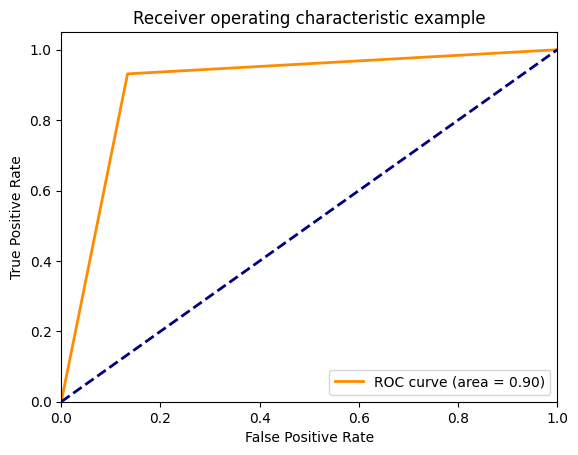

In [62]:
#decision tree
from sklearn import model_selection
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import time

start_time = time.time()
print()

# Call the fit_algo function with the Decision tree 
pred_now, acc_dt, acc_cv_dt, dt = fit_algo(DecisionTreeClassifier(random_state = 1)
                                        , X, y, 10)

dt_time = (time.time() - start_time)

print("Accuracy(train data): %s" % acc_dt)
print("Accuracy(test data): %s" % acc_cv_dt)
print("Execution time: %s" % dt_time)
print()
# Compute ROC curve and ROC area for each class
fpr, tpr, threshold = roc_curve(y,pred_now)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

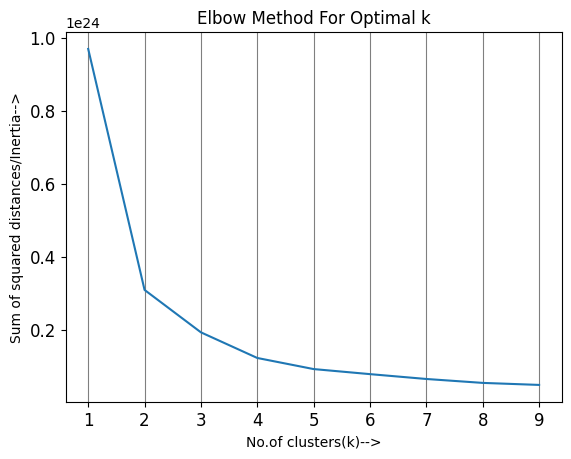

In [67]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances)

plt.xlabel('No.of clusters(k)-->') 
plt.ylabel('Sum of squared distances/Inertia-->') 
plt.title('Elbow Method For Optimal k')
plt.xticks(fontsize=12,color='black')
plt.yticks(fontsize=12,color='black')
plt.grid(which='both',color ='black',axis='x',alpha=0.5)
plt.show()

Confusion matrix:

 [[ 44177  48823]
 [113724  50949]]
Sensitivity (True positive rate): 0.3922082440802035
Specificity (True negative rate): 0.3922082440802035
Matthews Corellation Coefficient: -0.212555054126447
AUC: 0.39220824408020355
FAR (False alarm rate): 0.6308266679085508
FPR (False positive rate): 0.6077917559197965
Accuracy(train data): -3.0993061200680353e+25
Accuracy(test data): 36.92
Execution time: 5.651085376739502


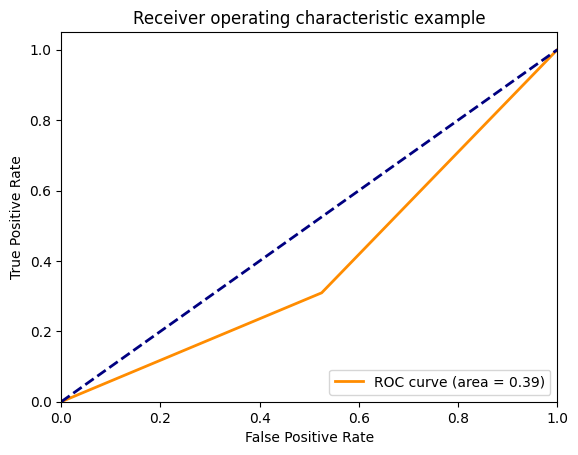

In [68]:
# kmeans for n clusters = 2
# set the optimal number of clusters based on the elbow curve
start_time = time.time()

# Call the fit_algo function with the kmeans model
pred_now, acc_kmean, acc_cv_kmean, kmeans= fit_algo(KMeans(n_clusters=2),X,y,5)

kmean_time = (time.time() - start_time)

print("Accuracy(train data): %s" % acc_kmean)
print("Accuracy(test data): %s" % acc_cv_kmean)
print("Execution time: %s" % kmean_time)
# Compute ROC curve and ROC area for each class
fpr, tpr, threshold = roc_curve(y,pred_now)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Confusion matrix:

 [[ 57808  35192]
 [ 24291 140382]]
Sensitivity (True positive rate): 0.7370404384995248
Specificity (True negative rate): 0.7370404384995248
Matthews Corellation Coefficient: 0.4886591949572158
AUC: 0.7370404384995248
FAR (False alarm rate): 0.2308468485250686
FPR (False positive rate): 0.2629595615004751
Accuracy(train data): 76.73
Accuracy(test data): 76.92
Execution time: 4.456451416015625


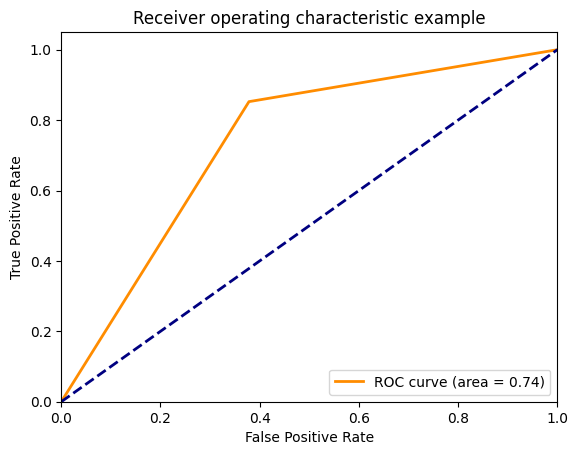

In [63]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
start_time = time.time()

# Call the fit_algo function with the naive bayes model
pred_now, acc_gnb, acc_cv_gnb, gnb= fit_algo(GaussianNB()
                                        ,X,y,5)

gnb_time = (time.time() - start_time)

print("Accuracy(train data): %s" % acc_gnb)
print("Accuracy(test data): %s" % acc_cv_gnb)
print("Execution time: %s" % gnb_time)
# Compute ROC curve and ROC area for each class
fpr, tpr, threshold = roc_curve(y,pred_now)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Confusion matrix:

 [[ 62774  30226]
 [ 49675 114998]]
Sensitivity (True positive rate): 0.6866654045368112
Specificity (True negative rate): 0.6866654045368112
Matthews Corellation Coefficient: 0.36153430149523064
AUC: 0.6866654045368112
FAR (False alarm rate): 0.31008681545990463
FPR (False positive rate): 0.31333459546318876
Accuracy (train data): 78.15
Accuracy(test data): 68.99
Execution time: 529.1953673362732


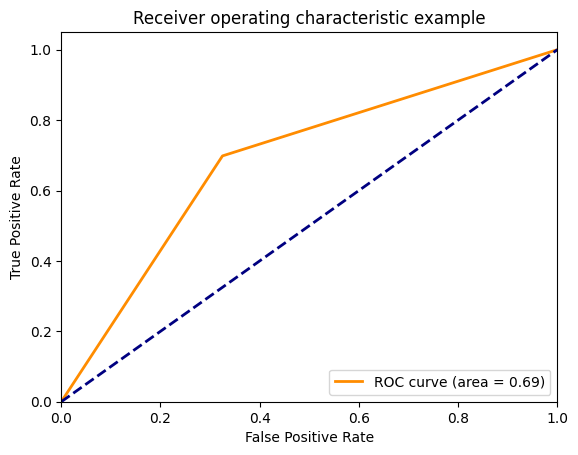

In [64]:
# SVM
from sklearn.svm import LinearSVC
start_time = time.time()

# Call the fit_algo function with the SVM model
pred_now, acc_svc, acc_cv_svc, svc= fit_algo(LinearSVC()
                                        ,X,y,10)

svc_time = (time.time() - start_time)

print("Accuracy (train data): %s" % acc_svc)
print("Accuracy(test data): %s" % acc_cv_svc)
print("Execution time: %s" % svc_time)
# Compute ROC curve and ROC area for each class
fpr, tpr, threshold = roc_curve(y,pred_now)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Confusion matrix:

 [[ 59520  33480]
 [ 42555 122118]]
Sensitivity (True positive rate): 0.6907893825945965
Specificity (True negative rate): 0.6907893825945965
Matthews Corellation Coefficient: 0.37469264807773645
AUC: 0.6907893825945965
FAR (False alarm rate): 0.29508330325645293
FPR (False positive rate): 0.30921061740540345
Accuracy(train data): 79.84
Accuracy(test data): 70.49
Execution time: 168.26954889297485


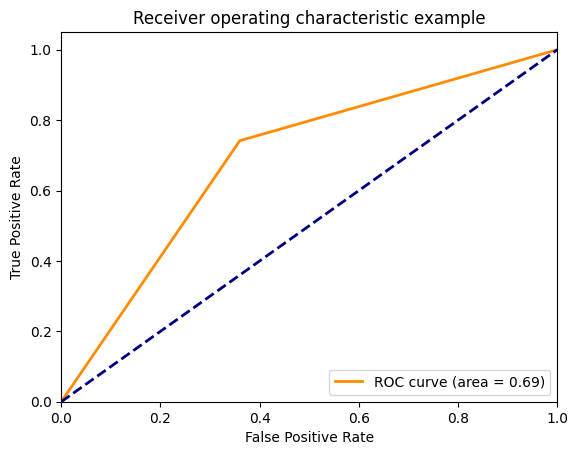

In [65]:
from sklearn.neural_network import MLPClassifier

start_time = time.time()
pred_now, acc_nn, acc_cv_nn, nn = fit_algo(MLPClassifier(hidden_layer_sizes = (20,), activation='relu', solver='adam'), X, y, 5)

nn_time = (time.time() - start_time)

print("Accuracy(train data): %s" % acc_nn)
print("Accuracy(test data): %s" % acc_cv_nn)
print("Execution time: %s" % nn_time)
# Compute ROC curve and ROC area for each class
fpr, tpr, threshold = roc_curve(y,pred_now)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()